Text(0.05, 0.8, 'Goodness of fit = 3.55E+01')

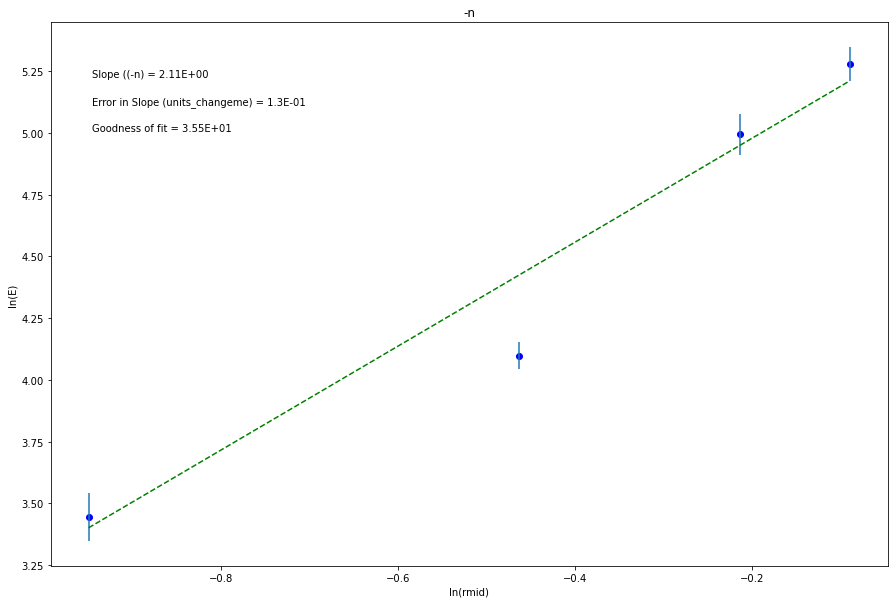

In [19]:
import numpy as np
import matplotlib.pyplot as plt

t= np.array([276.7,283.9,299.2,314.4,335.8])

r= np.array([.272,.502,.756,.859,.968])

j = np.array([ t[1]-t[0], t[2]-t[1], t[3]-t[2], t[4]-t[3] ])

o = np.array([ r[1]-r[0], r[2]-r[1], r[3]-r[2], r[4]-r[3] ])

u = np.array([ r[1]+r[0], r[2]+r[1], r[3]+r[2], r[4]+r[3] ])

#Create an array for your y-axis uncertainties
yerr = np.array ([.00000118,.00000104,.0000146,.0000345,.0000101])
#Reassign variables
x = np.log(u/2)
y = np.log(j/o)
dy = y*np.sqrt((2*.1/j)**2 + (.001/o)**2)

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('ln(rmid)')
plt.ylabel('ln(E)')
plt.title('-n')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope ((-n) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

In [14]:
t= np.array([276.7,283.9,299.2,314.4,335.8])
l = np.array([ t[1] - t[0], t[2] -t[1] ])